In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime

In [2]:
#%pip install Faker

In [3]:
hist_comp_madrid_int = pd.read_csv('../../evolucion_precioporm2_madrid_centro.csv')

hist_comp_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,4.268 €/m2,"+ 1,9 %","+ 5,0 %","+ 9,5 %",NaN
1,Enero 2024,4.190 €/m2,"+ 1,7 %","+ 3,1 %","+ 8,2 %",NaN
2,Diciembre 2023,4.118 €/m2,"+ 1,3 %","+ 2,0 %","+ 6,1 %",NaN
3,Noviembre 2023,4.064 €/m2,"+ 1,2 %","+ 3,8 %","0,0 %",NaN
4,Octubre 2023,4.064 €/m2,"+ 0,7 %","+ 1,6 %","+ 3,8 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,3.551 €/m2,"+ 2,1 %",n.d.,n.d.,NaN
214,Abril 2006,3.478 €/m2,NaN,n.d.,n.d.,"- 3,7 %"
215,Marzo 2006,3.609 €/m2,n.d.,n.d.,n.d.,NaN
216,Febrero 2006,n.d.,n.d.,n.d.,n.d.,NaN


In [4]:
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [5]:
hist_comp_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [6]:
hist_comp_madrid_int = hist_comp_madrid_int.iloc[:-2, :]

In [7]:
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('€/m2', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('.', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].astype(int)

In [8]:
hist_comp_madrid_int[['mes', 'año']] = hist_comp_madrid_int['fecha'].str.split(expand=True)
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns='fecha')

In [9]:
hist_comp_madrid_int = hist_comp_madrid_int[['año', 'mes', '€/m2']]

In [10]:
meses_a_numero = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

In [11]:
hist_comp_madrid_int['mes'] = hist_comp_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [12]:
hist_comp_madrid_int['fecha'] = pd.to_datetime(hist_comp_madrid_int['año'].astype(str) + '-' + hist_comp_madrid_int['mes'].astype(str), format='%Y-%m')

hist_comp_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [13]:
hist_comp_madrid_int = hist_comp_madrid_int[['fecha', '€/m2']]

In [14]:
hist_comp_madrid = pd.read_csv('../../evolucion_precioporm2_madrid.csv')

In [15]:
hist_comp_madrid

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5
0,Febrero 2024,3.292 €/m2,"+ 1,4 %","+ 3,8 %","+ 6,8 %"
1,Enero 2024,3.247 €/m2,"+ 1,2 %","+ 3,0 %","+ 6,1 %"
2,Diciembre 2023,3.208 €/m2,"+ 1,2 %","+ 2,5 %","+ 4,8 %"
3,Noviembre 2023,3.170 €/m2,"+ 0,6 %","+ 1,0 %","+ 3,1 %"
4,Octubre 2023,3.152 €/m2,"+ 0,7 %","+ 0,3 %","+ 3,1 %"
...,...,...,...,...,...
213,Mayo 2006,2.596 €/m2,"+ 1,9 %",NaN,"- 6,1 %"
214,Abril 2006,2.547 €/m2,NaN,"- 5,0 %","- 2,6 %"
215,Marzo 2006,2.614 €/m2,NaN,n.d.,"- 5,4 %"
216,Febrero 2006,2.765 €/m2,"+ 3,1 %",n.d.,NaN


In [16]:
hist_comp_madrid = hist_comp_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [17]:
hist_comp_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [18]:
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('€/m2', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].str.replace('.', '')
hist_comp_madrid['€/m2'] = hist_comp_madrid['€/m2'].astype(int)

In [19]:
hist_comp_madrid[['mes', 'año']] = hist_comp_madrid['fecha'].str.split(expand=True)
hist_comp_madrid = hist_comp_madrid.drop(columns='fecha')

In [20]:
hist_comp_madrid = hist_comp_madrid[['año', 'mes', '€/m2']]

In [21]:
hist_comp_madrid['mes'] = hist_comp_madrid['mes'].str.lower().replace(meses_a_numero)

In [22]:
hist_comp_madrid['fecha'] = pd.to_datetime(hist_comp_madrid['año'].astype(str) + '-' + hist_comp_madrid['mes'].astype(str), format='%Y-%m')

hist_comp_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [23]:
hist_comp_madrid = hist_comp_madrid[['fecha', '€/m2']]

In [24]:
hist_alq_madrid_int = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_centro.csv')

In [25]:
hist_alq_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,"18,7 €/m2","+ 2,3 %","+ 5,2 %","+ 15,5 %",NaN
1,Enero 2024,"18,3 €/m2","+ 1,8 %","+ 2,7 %","+ 14,1 %",NaN
2,Diciembre 2023,"17,9 €/m2","+ 1,0 %","+ 1,6 %","+ 13,6 %",NaN
3,Noviembre 2023,"17,7 €/m2","+ 1,9 %","+ 12,4 %","- 0,2 %",NaN
4,Octubre 2023,"17,8 €/m2","+ 0,8 %","+ 4,2 %","+ 11,6 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,n.d.,n.d.,n.d.,NaN,n.d.
214,Abril 2006,n.d.,n.d.,n.d.,NaN,n.d.
215,Marzo 2006,n.d.,n.d.,n.d.,NaN,n.d.
216,Febrero 2006,n.d.,n.d.,n.d.,NaN,n.d.


In [26]:
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [27]:
hist_alq_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [28]:
hist_alq_madrid_int = hist_alq_madrid_int.iloc[:-19, :]

In [29]:
hist_alq_madrid_int.tail()

,fecha,€/m2
194,Diciembre 2007,"12,7 €/m2"
195,Noviembre 2007,"13,4 €/m2"
196,Octubre 2007,"13,1 €/m2"
197,Septiembre 2007,"14,5 €/m2"
198,Agosto 2007,"14,1 €/m2"


In [30]:
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace('€/m2', '')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].str.replace(',','.')
hist_alq_madrid_int['€/m2'] = hist_alq_madrid_int['€/m2'].astype(float)

In [31]:
hist_alq_madrid_int[['mes', 'año']] = hist_alq_madrid_int['fecha'].str.split(expand=True)
hist_alq_madrid_int = hist_alq_madrid_int.drop(columns='fecha')

In [32]:
hist_alq_madrid_int = hist_alq_madrid_int[['año', 'mes', '€/m2']]

In [33]:
hist_alq_madrid_int['mes'] = hist_alq_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [34]:
hist_alq_madrid_int['fecha'] = pd.to_datetime(hist_alq_madrid_int['año'].astype(str) + '-' + hist_alq_madrid_int['mes'].astype(str), format='%Y-%m')

hist_alq_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [35]:
hist_alq_madrid_int = hist_alq_madrid_int[['fecha', '€/m2']]

In [36]:
hist_alq_madrid = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_comunidad.csv')

In [37]:
hist_alq_madrid = hist_alq_madrid.drop(columns=['table__cell 3','table__cell 4','table__cell 5'])

In [38]:
hist_alq_madrid.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [39]:
hist_alq_madrid = hist_alq_madrid.iloc[:-15, :]

In [40]:
hist_alq_madrid.tail()

,fecha,€/m2
198,Agosto 2007,"11,4 €/m2"
199,Julio 2007,"11,5 €/m2"
200,Junio 2007,"11,4 €/m2"
201,Mayo 2007,"11,9 €/m2"
202,Abril 2007,"11,6 €/m2"


In [41]:
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace('€/m2', '')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].str.replace(',','.')
hist_alq_madrid['€/m2'] = hist_alq_madrid['€/m2'].astype(float)

In [42]:
hist_alq_madrid[['mes', 'año']] = hist_alq_madrid['fecha'].str.split(expand=True)
hist_alq_madrid = hist_alq_madrid.drop(columns='fecha')

In [43]:
hist_alq_madrid = hist_alq_madrid[['año', 'mes', '€/m2']]

In [44]:
hist_alq_madrid['mes'] = hist_alq_madrid['mes'].str.lower().replace(meses_a_numero)

In [45]:
hist_alq_madrid['fecha'] = pd.to_datetime(hist_alq_madrid['año'].astype(str) + '-' + hist_alq_madrid['mes'].astype(str), format='%Y-%m')

hist_alq_madrid.drop(['mes', 'año'], axis=1, inplace=True)

In [46]:
hist_alq_madrid = hist_alq_madrid[['fecha', '€/m2']]

In [47]:
hist_comp_madrid_int.to_csv('hist_comp_madrid_centro.csv', index=True)

In [48]:
hist_comp_madrid.to_csv('hist_comp_madrid.csv', index=True)

In [49]:
hist_alq_madrid_int.to_csv('hist_alq_madrid_centro.csv', index=True)

In [50]:
hist_alq_madrid.to_csv('hist_alq_madrid.csv', index=True)

In [51]:
alquiler = pd.read_csv('../alquiler/madrid_alquiler_03.2024.csv')

alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje
0,4,central,arganzuela,600.0,25,0,3,3,3,0
1,0,central,arganzuela,700.0,35,2,0,1,0,0
2,0,central,arganzuela,790.0,40,1,1,0,1,0
3,4,central,arganzuela,800.0,40,0,3,3,3,0
4,0,central,arganzuela,800.0,35,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0
8178,3,central,villaverde,1475.0,64,2,5,1,1,0
8179,0,central,villaverde,1500.0,90,4,6,1,1,0
8180,0,central,villaverde,1895.0,80,2,0,1,1,0


In [52]:
mad_int = pd.read_csv('../venta_madrid centro/madrid_centro_compra_03.2024.csv')

mad_int

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,central,villaverde,26100,59,2,3,3,0
1,0,central,villaverde,50600,53,3,2,3,3
2,0,central,villaverde,51700,60,3,3,1,0
3,0,central,villaverde,51700,60,3,3,3,0
4,0,central,villaverde,51700,59,3,4,1,0
...,...,...,...,...,...,...,...,...,...
17819,1,central,arganzuela,1250000,302,5,-4,2,2
17820,1,central,arganzuela,1250000,380,2,-4,2,2
17821,0,central,arganzuela,1300000,360,4,-3,1,1
17822,0,central,arganzuela,1333000,214,4,6,1,1


In [53]:
mad_ext = pd.read_csv('../venta_madrid_ext/madrid_ext_compra_03.2024.csv')

mad_ext

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor
0,1,exterior,corredorhenares,24000,45,1,-4,2,2
1,1,exterior,corredorhenares,29900,72,2,-4,2,2
2,1,exterior,corredorhenares,47700,92,3,-4,2,2
3,1,exterior,corredorhenares,47700,92,3,-4,2,2
4,1,exterior,corredorhenares,49000,134,3,-4,2,2
...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2
17956,1,exterior,sureste,1400000,950,10,-4,2,2
17957,1,exterior,sureste,1500000,500,5,-4,2,2
17958,1,exterior,sureste,2000000,3000,1,-4,2,2


In [54]:
alquiler['€/m2'] = alquiler['precio'] / alquiler['superficie']

In [55]:
mad_ext['€/m2'] = mad_ext['precio'] / mad_ext['superficie']

In [56]:
mad_int['€/m2'] = mad_int['precio'] / mad_int['superficie']

In [57]:
precios = {}

for i in alquiler['distrito'].unique():
    
    df = alquiler[alquiler['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

alquiler['distrito_€/m2'] = alquiler['distrito'].map(precios)

In [58]:
precios2 = {}

for i in alquiler['distrito'].unique():
    
    df = alquiler[alquiler['distrito'] == i]
    
    precio_medio = df['precio'].mean()
    
    precios2[i] = precio_medio

alquiler['media_alq'] = alquiler['distrito'].map(precios2)

In [59]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,central,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,central,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,central,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,central,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,central,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,central,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,central,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [60]:
precios = {}

for i in mad_ext['distrito'].unique():
    
    df = mad_ext[mad_ext['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_ext['distrito_€/m2'] = mad_ext['distrito'].map(precios)

In [61]:
mad_ext

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,1,exterior,corredorhenares,24000,45,1,-4,2,2,533.333333,1315.967816
1,1,exterior,corredorhenares,29900,72,2,-4,2,2,415.277778,1315.967816
2,1,exterior,corredorhenares,47700,92,3,-4,2,2,518.478261,1315.967816
3,1,exterior,corredorhenares,47700,92,3,-4,2,2,518.478261,1315.967816
4,1,exterior,corredorhenares,49000,134,3,-4,2,2,365.671642,1315.967816
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [62]:
mad_ext.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
16189,1,exterior,sureste,15000,28,2,-4,2,2,535.714286,1291.265289
16190,1,exterior,sureste,17990,36,1,-4,2,2,499.722222,1291.265289
8969,0,exterior,suroeste,19800,45,2,2,1,0,440.000000,1395.049505
10166,1,exterior,norte,24000,40,2,-4,2,2,600.000000,2126.374537
0,1,exterior,corredorhenares,24000,45,1,-4,2,2,533.333333,1315.967816
...,...,...,...,...,...,...,...,...,...,...,...
5444,1,exterior,noroeste,11750000,1100,7,-4,2,2,10681.818182,2614.934340
5445,1,exterior,noroeste,12000000,1100,7,-4,2,2,10909.090909,2614.934340
8966,1,exterior,norte,14000000,1800,7,-4,2,2,7777.777778,2126.374537
8967,1,exterior,norte,15000000,1300,8,-4,2,2,11538.461538,2126.374537


In [63]:
precios = {}

for i in mad_int['distrito'].unique():
    
    df = mad_int[mad_int['distrito'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_int['distrito_€/m2'] = mad_int['distrito'].map(precios)

In [64]:
mad_int

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,central,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...,...
17819,1,central,arganzuela,1250000,302,5,-4,2,2,4139.072848,4700.675812
17820,1,central,arganzuela,1250000,380,2,-4,2,2,3289.473684,4700.675812
17821,0,central,arganzuela,1300000,360,4,-3,1,1,3611.111111,4700.675812
17822,0,central,arganzuela,1333000,214,4,6,1,1,6228.971963,4700.675812


In [65]:
mad_int.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
3967,0,central,puente de vallecas,33500,25,1,0,3,0,1340.000000,2409.435861
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
...,...,...,...,...,...,...,...,...,...,...,...
15937,0,central,barrio de salamanca,12500000,570,5,6,1,1,21929.824561,9597.237288
15938,0,central,barrio de salamanca,12500000,550,5,6,1,1,22727.272727,9597.237288
11017,1,central,chamartin,12950000,1116,7,-4,2,2,11603.942652,6855.511498
15939,2,central,barrio de salamanca,13090000,434,5,6,1,1,30161.290323,9597.237288


In [66]:
mad_int.precio.describe()

count    1.782400e+04
mean     7.711354e+05
std      9.301652e+05
min      2.610000e+04
25%      2.450000e+05
50%      4.700000e+05
75%      9.000000e+05
max      1.420000e+07
Name: precio, dtype: float64

In [67]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,central,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,central,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,central,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,central,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,central,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,central,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,central,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [68]:
mad_total = pd.concat([mad_int,mad_ext])

In [69]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,central,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [70]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,central,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...,...
17955,1,exterior,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17956,1,exterior,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
17957,1,exterior,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
17958,1,exterior,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [71]:
alquiler.precio.mean()

2269.9049132241507

In [72]:
alquiler.precio.median()

1600.0

In [73]:
mad_total.precio.mean()

637370.6351721439

In [74]:
mad_total.precio.median()

363000.0

In [75]:
mad_total.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2
16189,1,exterior,sureste,15000,28,2,-4,2,2,535.714286,1291.265289
16190,1,exterior,sureste,17990,36,1,-4,2,2,499.722222,1291.265289
8969,0,exterior,suroeste,19800,45,2,2,1,0,440.000000,1395.049505
0,1,exterior,corredorhenares,24000,45,1,-4,2,2,533.333333,1315.967816
10166,1,exterior,norte,24000,40,2,-4,2,2,600.000000,2126.374537
...,...,...,...,...,...,...,...,...,...,...,...
15939,2,central,barrio de salamanca,13090000,434,5,6,1,1,30161.290323,9597.237288
8966,1,exterior,norte,14000000,1800,7,-4,2,2,7777.777778,2126.374537
15940,2,central,barrio de salamanca,14200000,580,4,7,1,1,24482.758621,9597.237288
8967,1,exterior,norte,15000000,1300,8,-4,2,2,11538.461538,2126.374537


In [76]:
mad_total['€/m2'].describe()

count    35784.000000
mean      3870.391606
std       2658.281983
min          0.898876
25%       2014.538033
50%       2971.399325
75%       5000.000000
max      30161.290323
Name: €/m2, dtype: float64

In [77]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,central,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,central,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,central,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,central,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,central,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,central,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,central,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [78]:
precio_medio_por_zona = alquiler.groupby('distrito')['media_alq'].mean().reset_index()

mad_total = mad_total.merge(precio_medio_por_zona, on='distrito', how='left')

mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927,1022.743902
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927,1022.743902
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927,1022.743902
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927,1022.743902
4,0,central,villaverde,51700,59,3,4,1,0,876.271186,2233.461927,1022.743902
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289,1140.373626
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289,1140.373626
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289,1140.373626
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289,1140.373626


In [79]:
alquiler.groupby('distrito')['precio'].mean().sort_values(ascending=False)

distrito
norte                  3667.653495
barrio de salamanca    3380.434692
chamberi               2614.293814
hortaleza              2567.195918
chamartin              2556.775194
retiro                 2519.481605
moncloa                2344.992424
noroeste               2339.275613
centro                 2163.580364
fuencarral             1930.727273
tetuan                 1723.585799
arganzuela             1530.949664
ciudad lineal          1481.473430
barajas                1312.333333
san blas               1209.013986
moratalaz              1203.750000
vicalvaro              1203.685714
latina                 1181.094891
carabanchel            1167.688525
sureste                1140.373626
usera                  1133.242857
corredor de henares    1098.802198
suroeste               1095.575758
puente de vallecas     1051.457143
villa de vallecas      1047.074627
sur                    1045.674419
villaverde             1022.743902
Name: precio, dtype: float64

In [80]:
alquiler.groupby('distrito')['precio'].median().sort_values(ascending=False)

distrito
norte                  2800.0
barrio de salamanca    2565.0
chamberi               2290.0
retiro                 1900.0
chamartin              1820.0
centro                 1800.0
hortaleza              1700.0
noroeste               1700.0
moncloa                1650.0
fuencarral             1600.0
tetuan                 1500.0
arganzuela             1466.0
barajas                1352.5
ciudad lineal          1300.0
vicalvaro              1200.0
moratalaz              1200.0
latina                 1200.0
san blas               1100.0
carabanchel            1100.0
corredor de henares    1000.0
usera                  1000.0
villa de vallecas      1000.0
sur                     982.5
puente de vallecas      980.0
villaverde              958.5
sureste                 950.0
suroeste                900.0
Name: precio, dtype: float64

In [81]:
media = alquiler.groupby('distrito')['precio'].mean().reset_index()
mediana = alquiler.groupby('distrito')['precio'].median().reset_index()

resultado = media.merge(mediana, on='distrito')

resultado['diferencia'] = resultado['precio_x'] - resultado['precio_y']

resultado = resultado.sort_values(by='diferencia', ascending=False)

for index, row in resultado.iterrows():
    print(f"({row['distrito']}: {row['precio_x']}, {row['precio_y']}, Diferencia: {row['diferencia']})")

(norte: 3667.6534954407293, 2800.0, Diferencia: 867.6534954407293)
(hortaleza: 2567.195918367347, 1700.0, Diferencia: 867.1959183673471)
(barrio de salamanca: 3380.4346917450366, 2565.0, Diferencia: 815.4346917450366)
(chamartin: 2556.7751937984494, 1820.0, Diferencia: 736.7751937984494)
(moncloa: 2344.992424242424, 1650.0, Diferencia: 694.992424242424)
(noroeste: 2339.275613275613, 1700.0, Diferencia: 639.2756132756131)
(retiro: 2519.4816053511704, 1900.0, Diferencia: 619.4816053511704)
(centro: 2163.580364212193, 1800.0, Diferencia: 363.5803642121932)
(fuencarral: 1930.7272727272727, 1600.0, Diferencia: 330.72727272727275)
(chamberi: 2614.2938144329896, 2290.0, Diferencia: 324.2938144329896)
(tetuan: 1723.585798816568, 1500.0, Diferencia: 223.58579881656806)
(suroeste: 1095.5757575757575, 900.0, Diferencia: 195.5757575757575)
(sureste: 1140.3736263736264, 950.0, Diferencia: 190.3736263736264)
(ciudad lineal: 1481.4734299516908, 1300.0, Diferencia: 181.47342995169083)
(usera: 1133.242

In [82]:
df1 = alquiler[alquiler['distrito']=='arganzuela']

In [83]:
df1.precio.describe()

count     298.000000
mean     1530.949664
std       518.604071
min       600.000000
25%      1200.000000
50%      1466.000000
75%      1800.000000
max      5400.000000
Name: precio, dtype: float64

In [84]:
df2 = alquiler[alquiler['distrito']=='bsalamanca']

In [85]:
df2.precio.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: precio, dtype: float64

In [86]:
df3 = alquiler[alquiler['distrito']=='norte']

In [87]:
df3.precio.describe()

count      658.000000
mean      3667.653495
std       3654.062142
min        470.000000
25%       1292.500000
50%       2800.000000
75%       4500.000000
max      30000.000000
Name: precio, dtype: float64

In [88]:
df4 = mad_total['precio']

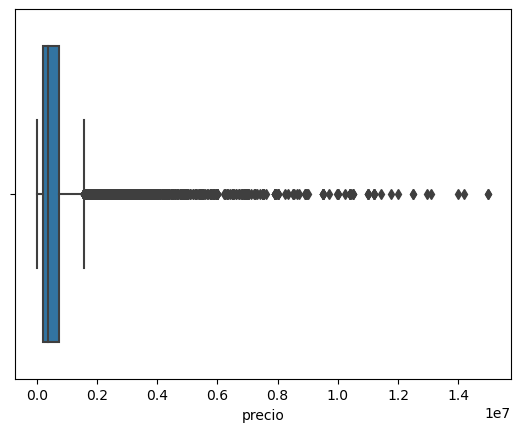

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=mad_total['precio'])
plt.show()

In [90]:
from faker import Faker

import random

faker = Faker()

ratings = [random.randint(1, 5) for _ in range(len(alquiler))]

ratings

[3,
 4,
 5,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 2,
 4,
 3,
 1,
 1,
 5,
 3,
 1,
 5,
 5,
 4,
 5,
 5,
 3,
 3,
 4,
 5,
 5,
 3,
 5,
 5,
 2,
 2,
 2,
 5,
 3,
 4,
 2,
 5,
 2,
 2,
 5,
 5,
 5,
 2,
 4,
 2,
 4,
 3,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 5,
 1,
 1,
 5,
 3,
 2,
 1,
 5,
 1,
 3,
 2,
 3,
 3,
 1,
 1,
 5,
 1,
 5,
 2,
 5,
 5,
 1,
 3,
 4,
 3,
 2,
 3,
 2,
 2,
 3,
 5,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 3,
 2,
 4,
 3,
 2,
 3,
 1,
 3,
 5,
 1,
 1,
 2,
 4,
 2,
 3,
 4,
 5,
 2,
 1,
 2,
 5,
 2,
 4,
 2,
 2,
 1,
 3,
 5,
 2,
 1,
 5,
 3,
 5,
 1,
 5,
 1,
 5,
 3,
 1,
 1,
 3,
 1,
 5,
 4,
 3,
 1,
 3,
 1,
 1,
 5,
 1,
 3,
 1,
 3,
 5,
 5,
 3,
 5,
 4,
 1,
 1,
 1,
 5,
 2,
 2,
 5,
 3,
 2,
 5,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 5,
 1,
 3,
 4,
 3,
 1,
 5,
 3,
 2,
 5,
 2,
 3,
 5,
 5,
 1,
 4,
 5,
 3,
 2,
 1,
 2,
 3,
 1,
 1,
 5,
 2,
 4,
 1,
 4,
 3,
 2,
 2,
 3,
 1,
 5,
 3,
 2,
 4,
 5,
 5,
 5,
 4,
 1,
 1,
 3,
 1,
 5,
 5,
 5,
 3,
 3,
 4,
 2,
 5,
 2,
 5,
 2,
 4,
 2,
 4,
 3,
 3,
 4,
 2,
 1,
 2,


In [91]:
#alquiler['rating'] = ratings

In [92]:
alquiler

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq
0,4,central,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,1530.949664
1,0,central,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,1530.949664
2,0,central,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1530.949664
3,4,central,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,1530.949664
4,0,central,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1530.949664
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,1022.743902
8178,3,central,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,1022.743902
8179,0,central,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,1022.743902
8180,0,central,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,1022.743902


In [97]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq
0,0,central,villaverde,26100,59,2,3,3,0,442.372881,2233.461927,1022.743902
1,0,central,villaverde,50600,53,3,2,3,3,954.716981,2233.461927,1022.743902
2,0,central,villaverde,51700,60,3,3,1,0,861.666667,2233.461927,1022.743902
3,0,central,villaverde,51700,60,3,3,3,0,861.666667,2233.461927,1022.743902
4,0,central,villaverde,51700,59,3,4,1,0,876.271186,2233.461927,1022.743902
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289,1140.373626
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289,1140.373626
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289,1140.373626
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289,1140.373626


In [93]:
alquiler.to_csv('alquiler_limp.csv', index=False)

In [94]:
mad_int.to_csv('mad_int_limp.csv', index=False)

In [95]:
mad_ext.to_csv('mad_ext_limp.csv', index=False)

In [96]:
mad_total.to_csv('mad_total_limp.csv', index=False)